# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [3]:
# read in csv files

nov_ur_2004 = pd.read_csv('./csv_files/nov_ur_2004')
nov_ur_2008 = pd.read_csv('./csv_files/nov_ur_2008')
nov_ur_2012 = pd.read_csv('./csv_files/nov_ur_2012')
nov_ur_2016 = pd.read_csv('./csv_files/nov_ur_2016')

oct_ur_2004 = pd.read_csv('./csv_files/oct_ur_2004')
oct_ur_2008 = pd.read_csv('./csv_files/oct_ur_2008')
oct_ur_2012 = pd.read_csv('./csv_files/oct_ur_2012')
oct_ur_2016 = pd.read_csv('./csv_files/oct_ur_2016')

results_2004 = pd.read_csv('./csv_files/results_2004')
results_2008 = pd.read_csv('./csv_files/results_2008')
results_2012 = pd.read_csv('./csv_files/results_2012')
results_2016 = pd.read_csv('./csv_files/results_2016')

edu_2000 = pd.read_csv('./csv_files/edu_2000')
edu_2010 = pd.read_csv('./csv_files/edu_2010')

combine the two unemployment rates

In [4]:
oct_ur_2004.set_index('county', inplace=True)
nov_ur_2004.set_index('county', inplace=True)
nov_ur_2004.drop('year', axis=1, inplace=True)

ur_2004 = pd.concat([oct_ur_2004, nov_ur_2004], axis=1)

In [5]:
oct_ur_2008.set_index('county', inplace=True)
nov_ur_2008.set_index('county', inplace=True)
nov_ur_2008.drop('year', axis=1, inplace=True)

ur_2008 = pd.concat([oct_ur_2008, nov_ur_2008], axis=1)

In [6]:
oct_ur_2012.set_index('county', inplace=True)
nov_ur_2012.set_index('county', inplace=True)
nov_ur_2012.drop('year', axis=1, inplace=True)

ur_2012 = pd.concat([oct_ur_2012, nov_ur_2012], axis=1)

In [7]:
oct_ur_2016.set_index('county', inplace=True)
nov_ur_2016.set_index('county', inplace=True)
nov_ur_2016.drop('year', axis=1, inplace=True)

ur_2016 = pd.concat([oct_ur_2016, nov_ur_2016], axis=1)

concat the election results with the corresponding unemployment rates for each year

In [8]:
# because Shannon County, SD county change it's name to Oglala Lakota County, SD between the 2004 and 2008, 
# I am changing the name to Oglala Lakota County for all elections
def Oglala (df):
    new_county = []
    for count in df['county']:
        if count == 'Shannon, SD':
            count = count.replace('Shannon, SD', 'Oglala Lakota, SD')
            new_county.append(count)          
        else:
            new_county.append(count)
    df.county = new_county
    return df

In [9]:
results_2004 = Oglala(results_2004)
results_2008 = Oglala(results_2008)
results_2012 = Oglala(results_2012)
results_2016 = Oglala(results_2016)

In [10]:
results_2004.shape, ur_2004.shape

((3110, 4), (3111, 7))

In [11]:
# reset index to be the county names

results_2004.set_index('county', inplace=True)

# Townhall has separated out the results for Bedford City and Bedford County, because 
# these are all one county now all other data is by Bedford county alone, this combines the
# results for the city and county

results_2004.loc['Bedford, VA'] = results_2004.loc['Bedford, VA'] + results_2004.loc['Bedford Co., VA']
results_2004.drop('Bedford Co., VA', inplace=True)


# townhall.com combined results for Kings(Brooklyn) and Richmond(Staten Island) into 
# New York for only the 2004 election. These are the updated repplacement results

results_2004.loc['New York, NY', 'dem_vote'] =  526765
results_2004.loc['New York, NY', 'rep_vote'] =  107405
results_2004.loc['Kings, NY', 'dem_vote'] = 514973
results_2004.loc['Kings, NY', 'rep_vote'] = 167149
results_2004.loc['Kings, NY', 'year'] = 2004
results_2004.loc['Richmond, NY', 'dem_vote'] = 68448
results_2004.loc['Richmond, NY', 'rep_vote'] = 90325
results_2004.loc['Richmond, NY', 'year'] = 2004

res_ur_2004 = pd.concat([results_2004, ur_2004], axis=1)
res_ur_2004['total_vote'] = res_ur_2004['dem_vote'] + res_ur_2004['rep_vote']

In [12]:
res_ur_2004.isnull().any()

dem_vote           False
rep_vote           False
year               False
oct_rate           False
year               False
nov_rate           False
2004_pop_est       False
total area sqmi    False
water area         False
land area          False
total_vote         False
dtype: bool

In [13]:
results_2008.set_index('county', inplace=True)

results_2008.loc['Bedford, VA'] = results_2008.loc['Bedford, VA'] + results_2008.loc['Bedford Co., VA']
results_2008.drop('Bedford Co., VA', inplace=True)

res_ur_2008 = pd.concat([results_2008, ur_2008], axis=1)
res_ur_2008['total_vote'] = res_ur_2008['dem_vote'] + res_ur_2008['rep_vote']

In [14]:
res_ur_2008.isnull().any()

dem_vote           False
rep_vote           False
year               False
oct_rate           False
year               False
nov_rate           False
2008_pop_est       False
total area sqmi    False
water area         False
land area          False
total_vote         False
dtype: bool

In [15]:
results_2012.set_index('county', inplace=True)

results_2012.loc['Bedford, VA'] = results_2012.loc['Bedford, VA'] + results_2012.loc['Bedford Co., VA']
results_2012.drop('Bedford Co., VA', inplace=True)

res_ur_2012 = pd.concat([results_2012, ur_2012], axis=1)
res_ur_2012['total_vote'] = res_ur_2012['dem_vote'] + res_ur_2012['rep_vote']

In [16]:
res_ur_2012.isnull().any()

dem_vote           False
rep_vote           False
year               False
oct_rate           False
year               False
nov_rate           False
2012_pop_est       False
total area sqmi    False
water area         False
land area          False
total_vote         False
dtype: bool

In [17]:
results_2016.set_index('county', inplace=True)

results_2016.loc['Bedford, VA'] = results_2016.loc['Bedford Co., VA']
results_2016.drop('Bedford Co., VA', inplace=True)

res_ur_2016 = pd.concat([results_2016, ur_2016], axis=1)
res_ur_2016['total_vote'] = res_ur_2016['dem_vote'] + res_ur_2016['rep_vote']

In [18]:
res_ur_2008.isnull().any()

dem_vote           False
rep_vote           False
year               False
oct_rate           False
year               False
nov_rate           False
2008_pop_est       False
total area sqmi    False
water area         False
land area          False
total_vote         False
dtype: bool

In [19]:
res_ur_2004.shape, res_ur_2008.shape, res_ur_2012.shape, res_ur_2016.shape

((3111, 11), (3111, 11), (3111, 11), (3111, 11))

In [20]:
res_ur_2012.describe()

,dem_vote,rep_vote,year,oct_rate,year,nov_rate,2012_pop_est,total area sqmi,water area,land area,total_vote
count,3.111000e+03,3111.000000,3111.000000,3111.000000,3111.0,3111.000000,3.111000e+03,3111.000000,3111.000000,3111.000000,3.111000e+03
mean,2.002726e+04,18960.045002,2012.646737,7.180039,2012.0,7.160077,1.004924e+05,1006.338428,53.128650,953.209730,3.898730e+04
std,6.704728e+04,42304.554005,36.072644,2.646497,0.0,2.632388,3.209693e+05,1329.588600,211.508454,1303.476913,1.056071e+05
min,5.000000e+00,54.000000,2012.000000,1.000000,2012.0,1.100000,8.100000e+01,1.990000,0.000000,1.990000,6.300000e+01
25%,1.554000e+03,2889.500000,2012.000000,5.200000,2012.0,5.200000,1.122500e+04,444.670000,1.890000,430.970000,4.698000e+03
50%,3.945000e+03,6389.000000,2012.000000,7.100000,2012.0,7.000000,2.601700e+04,646.720000,6.330000,612.520000,1.052300e+04
75%,1.110750e+04,15941.500000,2012.000000,8.800000,2012.0,8.800000,6.777600e+04,974.880000,20.905000,916.710000,2.710700e+04
max,1.781383e+06,754974.000000,4024.000000,28.200000,2012.0,25.100000,9.953555e+06,20105.320000,5424.980000,20052.500000,2.536357e+06


In [21]:
res_ur_2004['total_vote_ratio'] = res_ur_2004['total_vote'] / res_ur_2004['2004_pop_est']
res_ur_2008['total_vote_ratio'] = res_ur_2008['total_vote'] / res_ur_2008['2008_pop_est']
res_ur_2012['total_vote_ratio'] = res_ur_2012['total_vote'] / res_ur_2012['2012_pop_est']
res_ur_2016['total_vote_ratio'] = res_ur_2016['total_vote'] / res_ur_2016['2016_pop_est']

In [22]:
res_ur_2004['dem_vote_ratio'] = res_ur_2004['dem_vote'] / res_ur_2004['2004_pop_est']
res_ur_2008['dem_vote_ratio'] = res_ur_2008['dem_vote'] / res_ur_2008['2008_pop_est']
res_ur_2012['dem_vote_ratio'] = res_ur_2012['dem_vote'] / res_ur_2012['2012_pop_est']
res_ur_2016['dem_vote_ratio'] = res_ur_2016['dem_vote'] / res_ur_2016['2016_pop_est']

In [23]:
res_ur_2004['rep_vote_ratio'] = res_ur_2004['rep_vote'] / res_ur_2004['2004_pop_est']
res_ur_2008['rep_vote_ratio'] = res_ur_2008['rep_vote'] / res_ur_2008['2008_pop_est']
res_ur_2012['rep_vote_ratio'] = res_ur_2012['rep_vote'] / res_ur_2012['2012_pop_est']
res_ur_2016['rep_vote_ratio'] = res_ur_2016['rep_vote'] / res_ur_2016['2016_pop_est']

In [24]:
res_ur_2004[res_ur_2004.total_vote_ratio > 1]

,dem_vote,rep_vote,year,oct_rate,year,nov_rate,2004_pop_est,total area sqmi,water area,land area,total_vote,total_vote_ratio,dem_vote_ratio,rep_vote_ratio
"El Paso, CO",75055.0,156210.0,2004.0,5.2,2004,5.4,21977,1850.89,0.11,1850.78,231265.0,10.523047,3.415161,7.107886
"Fairfax Co., VA",215223.0,189371.0,2004.0,2.3,2004,2.3,21160,6.31,0.00,6.31,404594.0,19.120699,10.171219,8.949480
"Franklin Co., VA",8001.0,14048.0,2004.0,4.6,2004,4.7,8177,8.40,0.05,8.35,22049.0,2.696466,0.978476,1.717989
"King George, VA",2739.0,5144.0,2004.0,3.0,2004,3.0,6739,187.79,7.79,180.00,7883.0,1.169758,0.406440,0.763318
"Lake, IL",134231.0,139006.0,2004.0,4.7,2004,4.8,112135,1148.04,13.12,1134.92,273237.0,2.436679,1.197048,1.239631
"Loving, TX",12.0,65.0,2004.0,7.5,2004,5.9,55,676.85,3.77,673.08,77.0,1.400000,0.218182,1.181818
"Richmond, VA",49731.0,20606.0,2004.0,4.2,2004,4.7,9202,216.38,24.92,191.46,70337.0,7.643664,5.404369,2.239296
"St. Louis Co., MO",294402.0,244388.0,2004.0,8.8,2004,9.1,330988,66.15,4.23,61.92,538790.0,1.627823,0.889464,0.738359


In [25]:
res_ur_2016[res_ur_2016.total_vote_ratio > 1]

,dem_vote,rep_vote,year,oct_rate,year,nov_rate,2016_pop_est,total area sqmi,water area,land area,total_vote,total_vote_ratio,dem_vote_ratio,rep_vote_ratio
"El Paso, TX",145509,54567,2016,5.0,2016,4.8,168499,1014.68,1.57,1013.11,200076,1.187402,0.863560,0.323842
"Fairfax Co., VA",354485,157837,2016,3.2,2016,2.9,24164,6.31,0.00,6.31,512322,21.201871,14.669964,6.531907
"Franklin Co., VA",7254,18560,2016,5.4,2016,5.4,8306,8.40,0.05,8.35,25814,3.107874,0.873345,2.234529
"Jefferson, LA",73540,100292,2016,5.1,2016,4.7,31413,658.58,6.26,652.31,173832,5.533760,2.341069,3.192691
"Richmond, VA",74640,14254,2016,3.5,2016,3.3,8774,216.38,24.92,191.46,88894,10.131525,8.506952,1.624573
"St. Louis Co., MO",280866,199081,2016,5.3,2016,4.5,311404,66.15,4.23,61.92,479947,1.541236,0.901934,0.639301
"Virginia Beach, VA",76744,84389,2016,4.0,2016,3.8,39155,497.33,249.03,248.29,161133,4.115260,1.960005,2.155255
"Washington, VA",5548,19309,2016,4.5,2016,4.2,17592,565.98,3.12,562.86,24857,1.412972,0.315371,1.097601
"York, VA",12989,18823,2016,3.9,2016,3.6,27516,215.52,109.87,105.65,31812,1.156127,0.472053,0.684075


The populations for the counties are based on the Census Buruea's estimations for the population in that year. This estimation is beased on 2000 and 2010 populations and estimated growth rates. In fast growing counties these estimates can underrepresent the poplation. Which leads to a votes ratio of higher than 1.

For the purposes of graphical representation these outliers will be dropped.

### Combine elections DataFrame with Education

In [26]:
print(res_ur_2004.shape, edu_2000.shape)

edu_2000.set_index('county', inplace=True)

df_2004 = pd.concat([res_ur_2004, edu_2000], axis=1)

print(df_2004.shape)

df_2004.dropna(inplace=True)

(3111, 14) (3111, 27)
(3111, 40)


In [27]:
df_2008 = pd.concat([res_ur_2008, edu_2000], axis=1)

print(df_2008.shape)

(3111, 40)


In [28]:
edu_2010.set_index('county', inplace=True)

df_2012 = pd.concat([res_ur_2012, edu_2010], axis=1)

df_2012.shape

(3111, 40)

In [29]:
df_2016 = pd.concat([res_ur_2016, edu_2010], axis=1)

df_2016.shape

(3111, 40)

In [30]:
df_2004['total_vote_ratio'] = df_2004['total_vote'] / df_2004['2004_pop_est']
df_2008['total_vote_ratio'] = df_2008['total_vote'] / df_2008['2008_pop_est']
df_2012['total_vote_ratio'] = df_2012['total_vote'] / df_2012['2012_pop_est']
df_2016['total_vote_ratio'] = df_2016['total_vote'] / df_2016['2016_pop_est']

## For the graphical analysis outliers have been dropped to show relationships

In [31]:
df_2004.columns

Index(['dem_vote', 'rep_vote', 'year', 'oct_rate', 'year', 'nov_rate',
       '2004_pop_est', 'total area sqmi', 'water area', 'land area',
       'total_vote', 'total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio',
       'continuum_2003', 'influence_2003', 'less_high_1990',
       'high_diploma_1990', 'some_college_1990', 'bachelors_or_higher_1990',
       'per_less_high_1990', 'per_high_diploma_1990', 'per_some_college_1990',
       'per_bachelors_or_higher_1990', 'less_high_2000', 'high_diploma_2000',
       'some_college_2000', 'bachelors_or_higher_2000', 'per_less_high_2000',
       'per_high_diploma_2000', 'per_some_college_2000',
       'per_bachelors_or_higher_2000', 'less_high_change',
       'high_dimploma_change', 'some_college_change', 'bachelors_change',
       'per_less_high_change', 'per_high_dimploma_change',
       'per_some_college_change', 'per_bachelors_change'],
      dtype='object')

In [32]:
df_2004['vote_diff'] = (df_2004.dem_vote - df_2004.rep_vote) / df_2004['2004_pop_est']
df_2008['vote_diff'] = df_2008.dem_vote - df_2008.rep_vote
df_2012['vote_diff'] = df_2012.dem_vote - df_2012.rep_vote
df_2016['vote_diff'] = df_2016.dem_vote - df_2016.rep_vote

In [33]:
df_2004.columns

Index(['dem_vote', 'rep_vote', 'year', 'oct_rate', 'year', 'nov_rate',
       '2004_pop_est', 'total area sqmi', 'water area', 'land area',
       'total_vote', 'total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio',
       'continuum_2003', 'influence_2003', 'less_high_1990',
       'high_diploma_1990', 'some_college_1990', 'bachelors_or_higher_1990',
       'per_less_high_1990', 'per_high_diploma_1990', 'per_some_college_1990',
       'per_bachelors_or_higher_1990', 'less_high_2000', 'high_diploma_2000',
       'some_college_2000', 'bachelors_or_higher_2000', 'per_less_high_2000',
       'per_high_diploma_2000', 'per_some_college_2000',
       'per_bachelors_or_higher_2000', 'less_high_change',
       'high_dimploma_change', 'some_college_change', 'bachelors_change',
       'per_less_high_change', 'per_high_dimploma_change',
       'per_some_college_change', 'per_bachelors_change', 'vote_diff'],
      dtype='object')

In [34]:
df_2004.rename(columns={'land area': 'land_area'}, inplace=True)
df_2004_normalized = df_2004[['oct_rate', 'nov_rate', 'land_area', 'total_vote_ratio', 'dem_vote_ratio', 
                              'rep_vote_ratio', 'vote_diff', 'continuum_2003', 'influence_2003', 
                              'per_less_high_2000', 'per_high_diploma_2000', 'per_some_college_2000',
                              'per_bachelors_or_higher_2000', 'less_high_change', 'high_dimploma_change', 
                              'some_college_change', 'bachelors_change', 'per_less_high_change', 
                              'per_high_dimploma_change', 'per_some_college_change', 'per_bachelors_change']]

In [35]:
df_2008.rename(columns={'land area': 'land_area'}, inplace=True)
df_2008_normalized = df_2008[['oct_rate', 'nov_rate', 'land_area', 'total_vote_ratio', 'dem_vote_ratio', 
                              'rep_vote_ratio', 'vote_diff', 'continuum_2003', 'influence_2003', 
                              'per_less_high_2000', 'per_high_diploma_2000', 'per_some_college_2000',
                              'per_bachelors_or_higher_2000', 'less_high_change', 'high_dimploma_change', 
                              'some_college_change', 'bachelors_change', 'per_less_high_change', 
                              'per_high_dimploma_change', 'per_some_college_change', 'per_bachelors_change']]

In [36]:
df_2012.rename(columns={'land area': 'land_area'}, inplace=True)
df_2012_normalized = df_2012[['oct_rate', 'nov_rate', 'land_area', 'total_vote_ratio', 'dem_vote_ratio', 
                              'rep_vote_ratio', 'vote_diff', 'continuum_2013', 'influence_2013', 
                              'per_less_high_2011', 'per_high_diploma_2011', 'per_some_college_2011',
                              'per_bachelors_or_higher_2011', 'less_high_change', 'high_dimploma_change', 
                              'some_college_change', 'bachelors_change', 'per_less_high_change', 
                              'per_high_diploma_change', 'per_some_college_change', 'per_bachelors_change']]

In [37]:
df_2016.rename(columns={'land area': 'land_area'}, inplace=True)
df_2016_normalized = df_2016[['oct_rate', 'nov_rate', 'land_area', 'total_vote_ratio', 'dem_vote_ratio', 
                              'rep_vote_ratio', 'vote_diff', 'continuum_2013', 'influence_2013', 
                              'per_less_high_2011', 'per_high_diploma_2011', 'per_some_college_2011',
                              'per_bachelors_or_higher_2011', 'less_high_change', 'high_dimploma_change', 
                              'some_college_change', 'bachelors_change', 'per_less_high_change', 
                              'per_high_diploma_change', 'per_some_college_change', 'per_bachelors_change']]

In [38]:
df_2004_normalized = df_2004_normalized[df_2004_normalized.total_vote_ratio < 1]
df_2004_normalized = df_2004_normalized[df_2004_normalized.rep_vote_ratio < 1]
df_2004_normalized = df_2004_normalized[df_2004_normalized.dem_vote_ratio < 1]

df_2008_normalized = df_2008_normalized[df_2008_normalized.total_vote_ratio < 1]
df_2008_normalized = df_2008_normalized[df_2008_normalized.rep_vote_ratio < 1]
df_2008_normalized = df_2008_normalized[df_2008_normalized.dem_vote_ratio < 1]

df_2012_normalized = df_2012_normalized[df_2012_normalized.total_vote_ratio < 1]
df_2012_normalized = df_2012_normalized[df_2012_normalized.rep_vote_ratio < 1]
df_2012_normalized = df_2012_normalized[df_2012_normalized.dem_vote_ratio < 1]

df_2016_normalized = df_2016_normalized[df_2016_normalized.total_vote_ratio < 1]
df_2016_normalized = df_2016_normalized[df_2016_normalized.rep_vote_ratio < 1]
df_2016_normalized = df_2016_normalized[df_2016_normalized.dem_vote_ratio < 1]

## 2004 Election

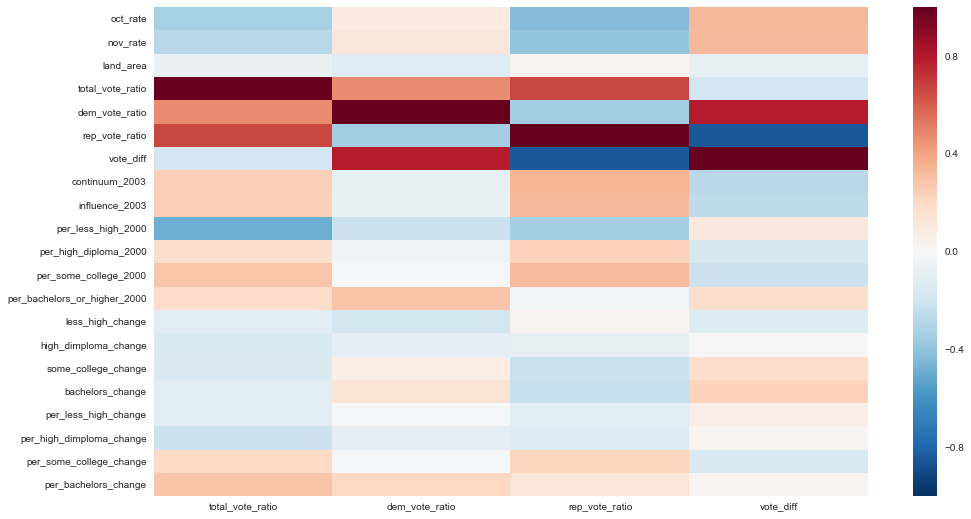

In [39]:
cor = df_2004_normalized.corr()

plt.figure(figsize = [16, 9])
sns.heatmap(cor[['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff']])

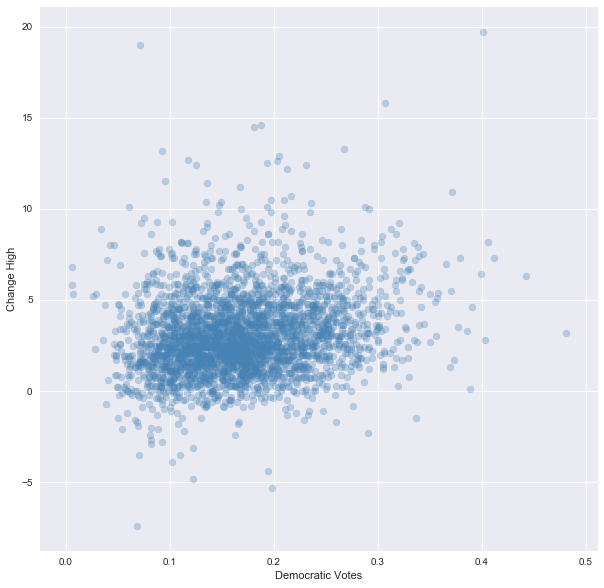

In [40]:
plt.figure(figsize = [10, 10])
plt.xlabel('Democratic Votes')
plt.ylabel('Change High')
plt.scatter('dem_vote_ratio', 'per_bachelors_change', data=df_2004_normalized, alpha=.3, color='steelblue')

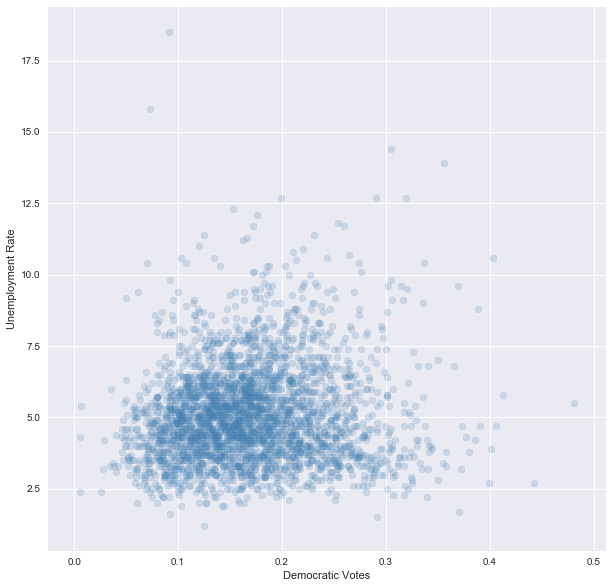

In [41]:
plt.figure(figsize = [10, 10])
plt.xlabel('Democratic Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('dem_vote_ratio', 'oct_rate', data=df_2004_normalized, alpha=.2, color='steelblue')

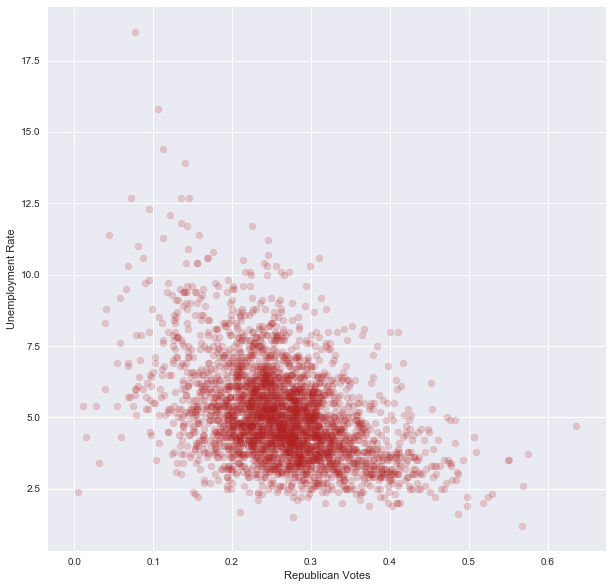

In [42]:
plt.figure(figsize = [10, 10])
plt.xlabel('Republican Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('rep_vote_ratio', 'oct_rate', data=df_2004_normalized, alpha=.2, color='firebrick')

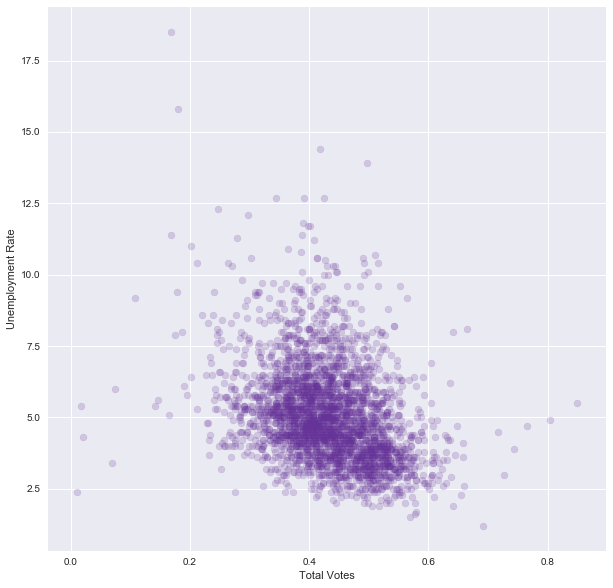

In [43]:
plt.figure(figsize = [10, 10])
plt.xlabel('Total Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('total_vote_ratio', 'oct_rate', data=df_2004_normalized, alpha=.2, color='rebeccapurple')

# 2008 Election

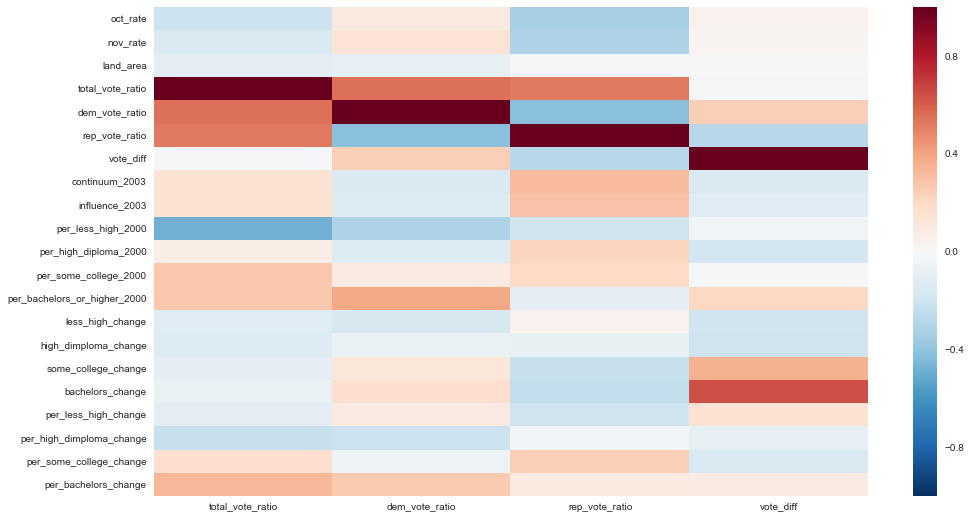

In [44]:
cor = df_2008_normalized.corr()

plt.figure(figsize = [16, 9])
sns.heatmap(cor[['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff']])

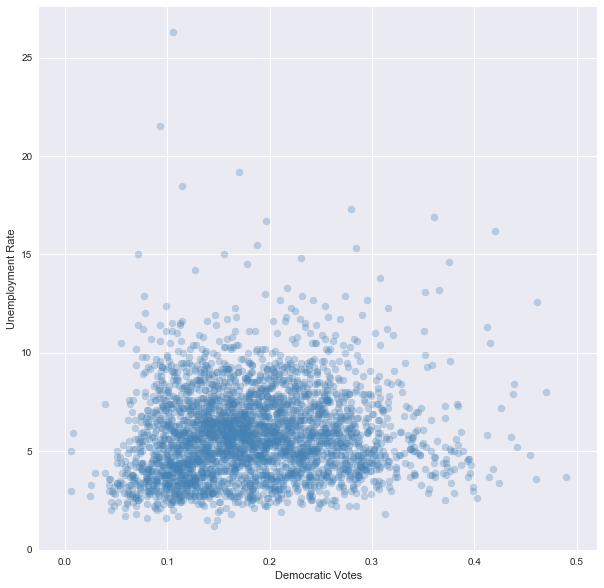

In [45]:
plt.figure(figsize = [10, 10])
plt.xlabel('Democratic Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('dem_vote_ratio', 'oct_rate', data=df_2008_normalized, alpha=.3, color='steelblue')

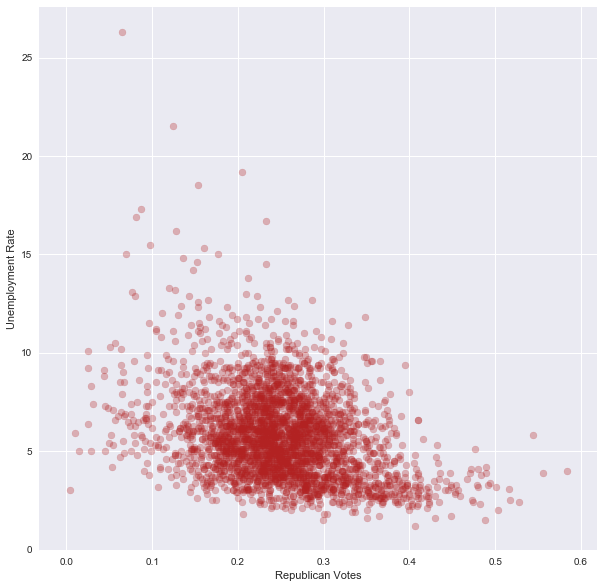

In [46]:
plt.figure(figsize = [10, 10])
plt.xlabel('Republican Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('rep_vote_ratio', 'oct_rate', data=df_2008_normalized, alpha=.3, color='firebrick')

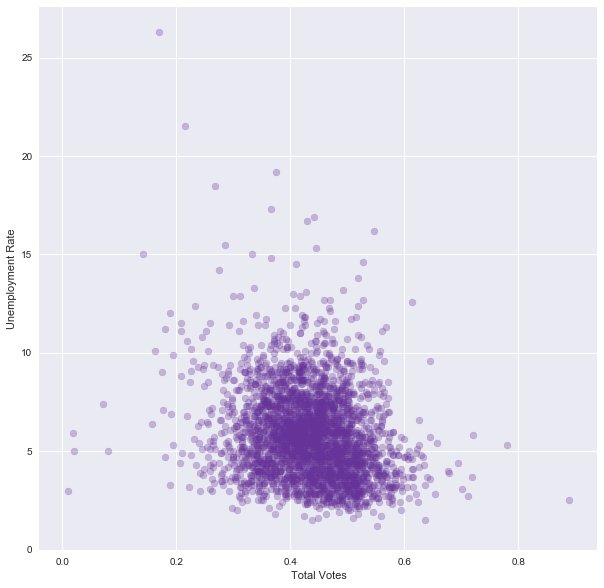

In [47]:
plt.figure(figsize = [10, 10])
plt.xlabel('Total Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('total_vote_ratio', 'oct_rate', data=df_2008_normalized, alpha=.3, color='rebeccapurple')

# 2012 Election

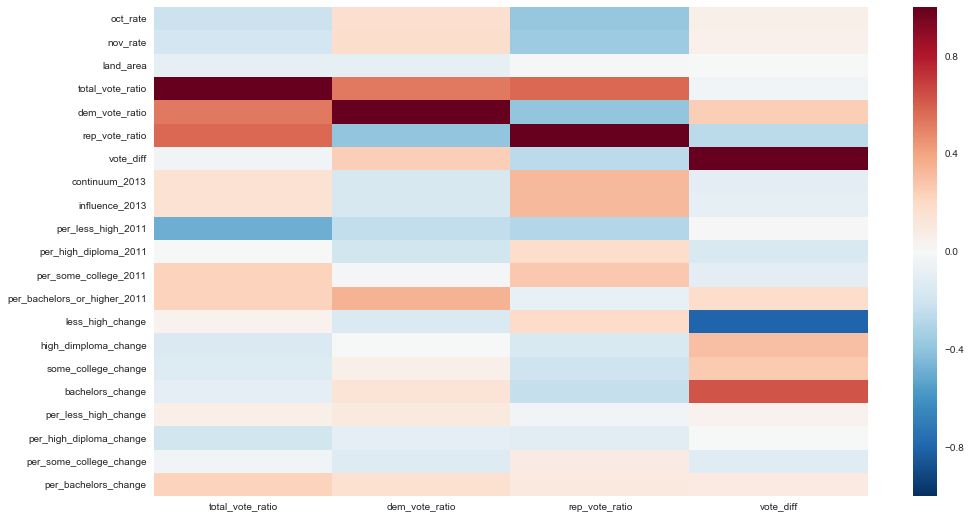

In [48]:
cor = df_2012_normalized.corr()

plt.figure(figsize = [16, 9])
sns.heatmap(cor[['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff']])

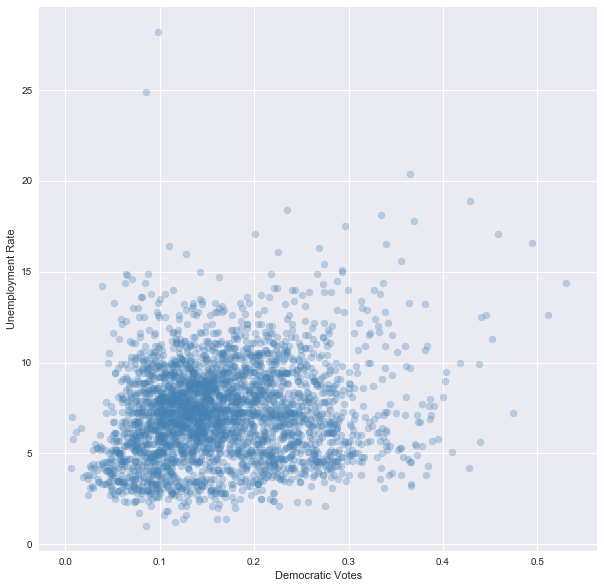

In [49]:
plt.figure(figsize = [10, 10])
plt.xlabel('Democratic Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('dem_vote_ratio', 'oct_rate', data=df_2012_normalized, alpha=.3, color='steelblue')

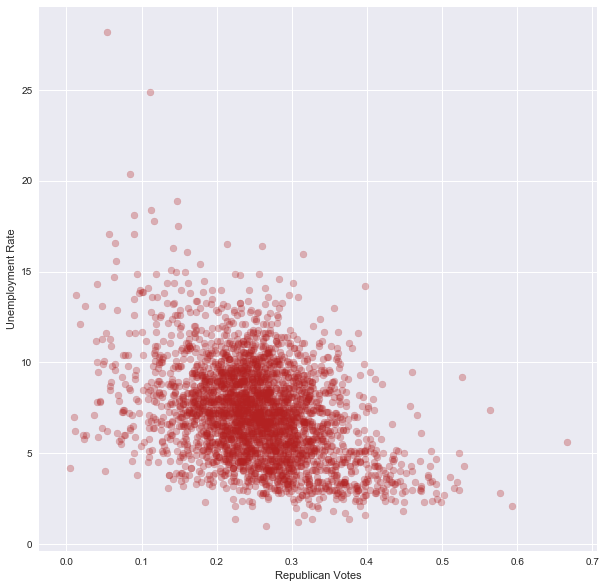

In [50]:
plt.figure(figsize = [10, 10])
plt.xlabel('Republican Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('rep_vote_ratio', 'oct_rate', data=df_2012_normalized, alpha=.3, color='firebrick')

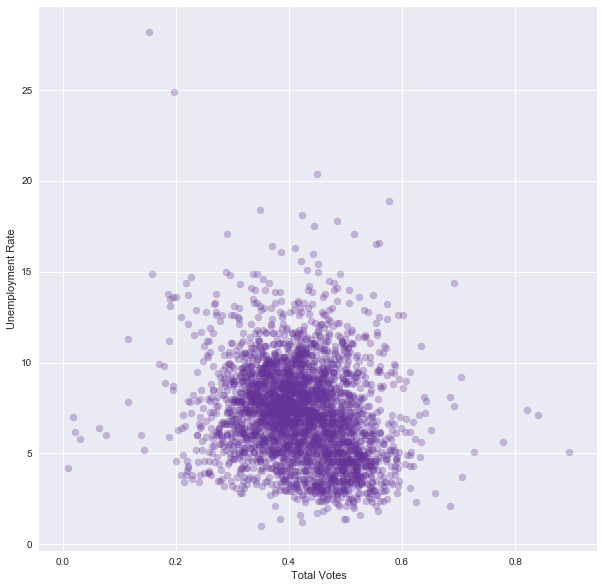

In [51]:
plt.figure(figsize = [10, 10])
plt.xlabel('Total Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('total_vote_ratio', 'oct_rate', data=df_2012_normalized, alpha=.3, color='rebeccapurple')

# 2016 Election

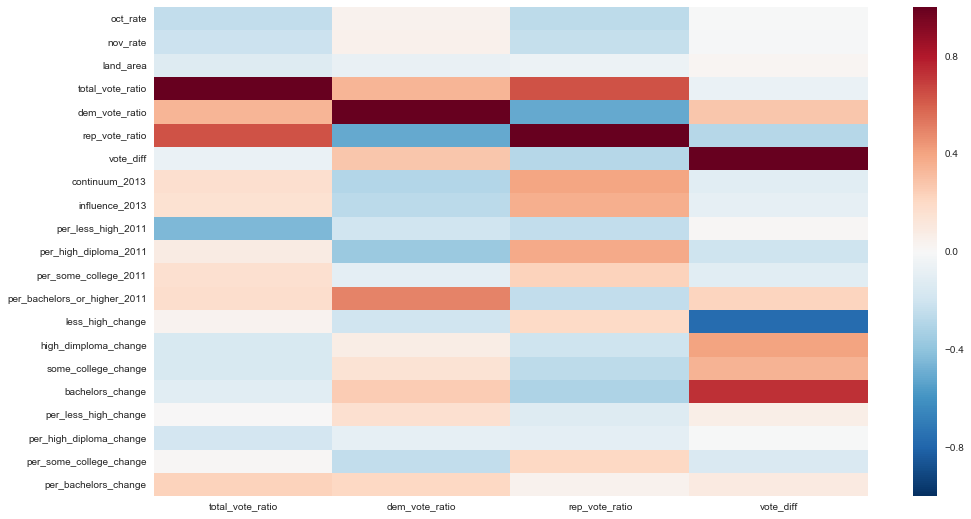

In [52]:
cor = df_2016_normalized.corr()

plt.figure(figsize = [16, 9])
sns.heatmap(cor[['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff']])

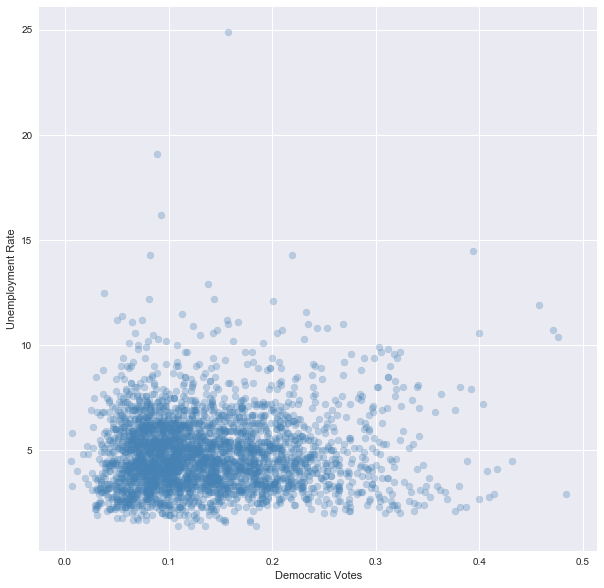

In [53]:
plt.figure(figsize = [10, 10])
plt.xlabel('Democratic Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('dem_vote_ratio', 'oct_rate', data=df_2016_normalized, alpha=.3, color='steelblue')

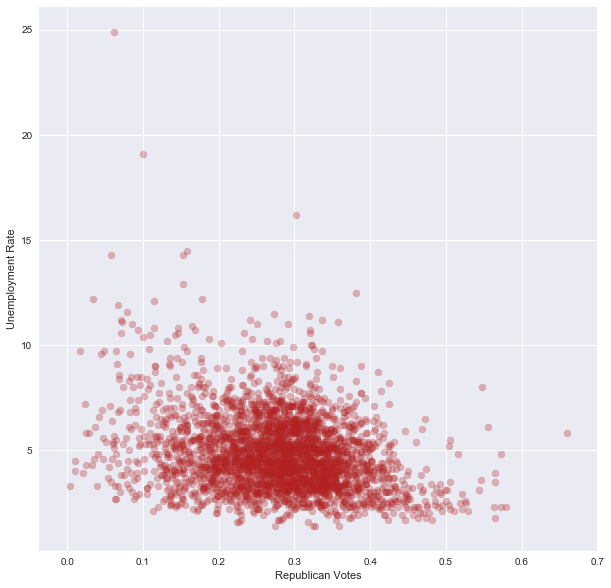

In [54]:
plt.figure(figsize = [10, 10])
plt.xlabel('Republican Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('rep_vote_ratio', 'oct_rate', data=df_2016_normalized, alpha=.3, color='firebrick')

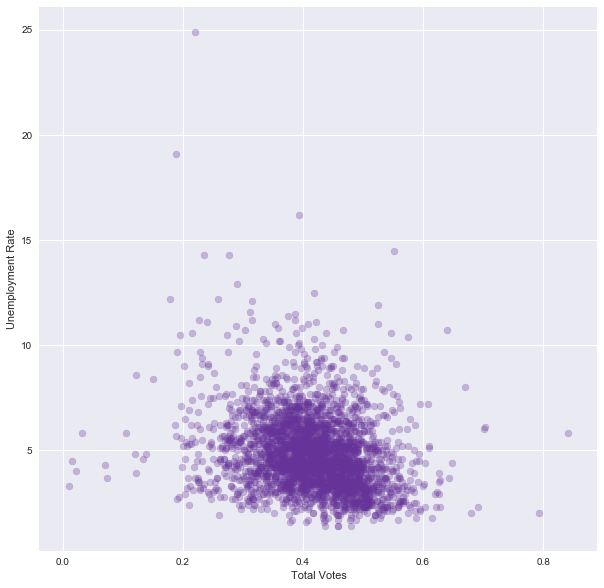

In [55]:
plt.figure(figsize = [10, 10])
plt.xlabel('Total Votes')
plt.ylabel('Unemployment Rate')
plt.scatter('total_vote_ratio', 'oct_rate', data=df_2016_normalized, alpha=.3, color='rebeccapurple')

In [56]:
df_2004_normalized.to_csv('./csv_files/df_2004', index=False)
df_2008_normalized.to_csv('./csv_files/df_2008', index=False)
df_2012_normalized.to_csv('./csv_files/df_2012', index=False)
df_2016_normalized.to_csv('./csv_files/df_2016', index=False)

In [57]:
df_2004.to_csv('./csv_files/df_2004_all', index=False)
df_2008.to_csv('./csv_files/df_2008_all', index=False)
df_2012.to_csv('./csv_files/df_2012_all', index=False)
df_2016.to_csv('./csv_files/df_2016_all', index=False)